# Superstore Dataset
## Progetto Data Science 2022 - Brocchi Martina

In [209]:
from matplotlib import pyplot as plt
import pandas as pd
import pycountry
import plotly.express as px

import numpy as np

Il dataset superstore contiene i dati relativi alle vendite e ai profitti di un supermercato negli Stati Uniti.

### Import dataset e analisi caratteristiche
Per prima cosa andiamo ad importare il dataset e analizziamo alcune sue caratteristiche principali.

In [210]:
superstore = pd.read_csv('Sample-Superstore.csv', encoding='ISO-8859-1')
superstore.shape

(9994, 21)

In [211]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Andiamo a suddividere features qualitative e features quantitative e a andiamo a utilizzare la funzione describe per ottenere informazioni su di esse.

In [212]:
superstore_quantitative = superstore[['Row ID','Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']]
superstore_qualitative = superstore[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']]
superstore_quantitative.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [213]:
superstore_qualitative.describe()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


Dall'analisi delle features qualitative possiamo evincere come il dataset contenga informazioni su 5009 ordini, effettuati per 793 clienti diversi. Tutti gli ordini sono stati inviati negli Stati Uniti, con una maggiore frequenza nell'ovest del paese, in particolare in California.

Le categorie di prodotti spediti sono 3.

Inoltre, come possiamo osservare dai valori della riga count di entrambe le tabelle ottenute, non abbiamo valori nulli all'interno del dataset. Andiamo a confermare tale osservazione tramite la funzione isnull().

In [214]:
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Vendite per categoria e profitti

Tracciamo il grafico a barre delle categorie e delle vendite di prodotti per stabilire quale sia la categoria più popolare.

In [215]:
superstore[['Product ID','Sales']].duplicated().sum()

1785

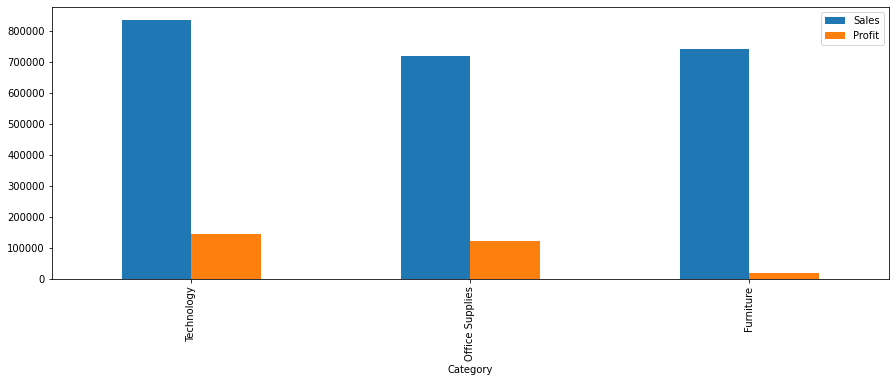

In [226]:
superstore_category=superstore.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
superstore_category.plot(kind='bar', figsize=(15,5))

plt.show()

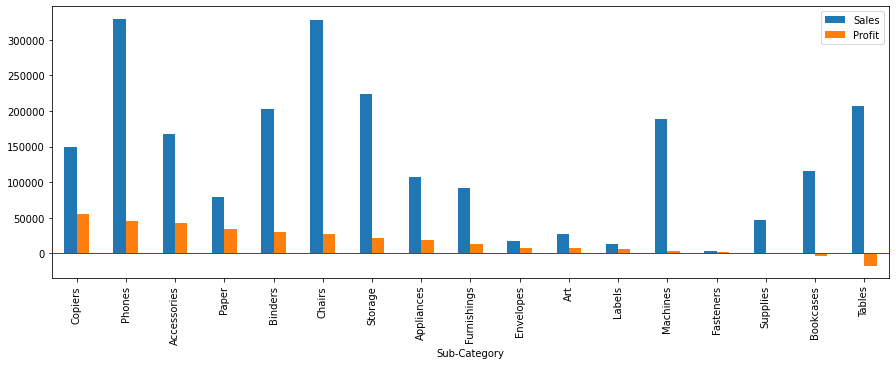

In [227]:
superstore_sub_category=superstore.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
superstore_sub_category.plot(kind='bar', figsize=(15,5))
plt.axhline(y=0, color='r', linestyle='-', lw=1)

plt.show()

In [228]:
superstore_sub_category.corr(method='pearson')

,Sales,Profit
Sales,1.000000,0.421575
Profit,0.421575,1.000000


Proviamo ad analizzare da quale parte del paese derivano le maggiori perdite nella sotto-categoria dei tavoli.

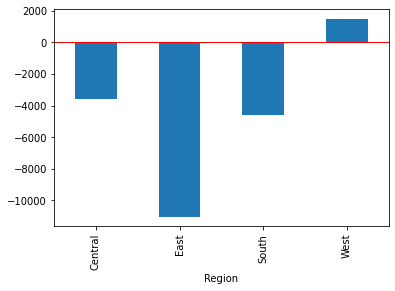

In [219]:
A = superstore[superstore['Sub-Category'] == 'Tables']
A.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.axhline(y=0, color='r', linestyle='-', lw=1)
plt.show()

Come possiamo osservare le perdite maggiori nella categoria dei tavoli derivano dalle vendite effettuate nell'est del paese, mentre l'unica regione che ha portato dei profitti è quella dell'ovest del paese. Proviamo a tracciare l'andamento dei profitti per regione della sotto-categoria con i profitti maggiori (fotocopiatrici) per vedere se corrisponde a quello della categoria con i profitti minori.

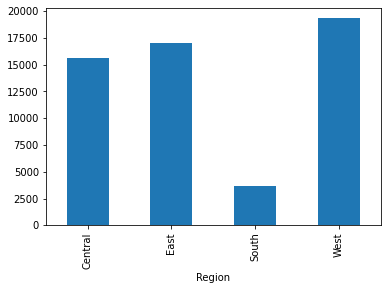

In [220]:
A = superstore[superstore['Sub-Category'] == 'Copiers']
A.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.axhline(y=0, color='r', linestyle='-', lw=1)
plt.show()

Anche in questo caso i profitti maggiori della categoria arrivano dalle vendite nell'ovest del paese, tuttavia i profitti minori arrivano dal sud del paese e non più dall'est. Questo ci porta a formulare delle ipotesi:
* Le vendite e i profitti sono maggiori nell'ovest degli Stati Uniti

Andiamo a tracciare il profitto totale per singolo stato

In [221]:
codes = np.empty_like(superstore['State'])
tot_profit = np.empty_like(superstore['Profit'])

for elem in superstore['State'].unique(): 
    codes[np.where(superstore['State'] == elem)] = pycountry.subdivisions.lookup(elem).code[3:5]
    tot_profit[np.where(superstore['State']==elem)] = superstore.groupby('State')['Profit'].sum().get(elem)

codes[np.where(codes=='12')] = 'MT'
superstore['State Code'] = codes
superstore['Total profit per State'] = tot_profit

fig = px.choropleth(superstore,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total profit per State',
                    color_continuous_scale="Viridis_r",
                    )
fig.show()

Come ci aspettavamo i guadagni maggiori arrivano dall'ovest del paese, in particolare dalla California, mentre nel sud del paese si registrano delle forti perdite nel Texas.